<a href="https://colab.research.google.com/github/Rk-Pudasaini/Data_Analysis/blob/main/Kalimati_tarkari_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Kalimati_Tarkari_Dataset.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/Rk-Pudasaini/Data_Analysis/main/Kalimati_Tarkari_Price_Analysis/Kalimati_Tarkari_Dataset.csv')
df.head()

<ipython-input-32-795d6631dc45>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Kalimati_Tarkari_Dataset.csv')


,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,Potato Red,6/16/2013,Kg,20,21,20.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0


In [ ]:
df.tail()

,Commodity,Date,Unit,Minimum,Maximum,Average
280857,Tomato Small(Indian),2023-09-28,KG,Rs 45.00,Rs 55.00,Rs 50.00
280858,Tomato Small(Local),2023-09-28,KG,Rs 50.00,Rs 60.00,Rs 55.00
280859,Tomato Small(Tunnel),2023-09-28,KG,Rs 60.00,Rs 75.00,Rs 69.00
280860,Turnip A,2023-09-28,KG,Rs 70.00,Rs 80.00,Rs 75.00
280861,Water Melon(Green),2023-09-28,KG,Rs 50.00,Rs 60.00,Rs 56.67


In [ ]:
df.shape

(280862, 6)

In [ ]:
df.dtypes

Commodity    object
Date         object
Unit         object
Minimum      object
Maximum      object
Average      object
dtype: object

In [ ]:
# Convert 'Minimum' column to numeric, removing 'Rs' if present
df['Minimum'] = pd.to_numeric(df['Minimum'].apply(lambda x: str(x).replace('Rs', '').strip()))
df['Maximum'] = pd.to_numeric(df['Maximum'].apply(lambda x: str(x).replace('Rs', '').strip()))
df['Average'] = pd.to_numeric(df['Average'].apply(lambda x: str(x).replace('Rs', '').strip()))

In [ ]:
from dateutil import parser

# function to format the date columns in year-month-day type
def format_date(date):
    try:
        parsed_date = parser.parse(date)
        standardized_date = parsed_date.strftime("%Y-%m-%d")
        return standardized_date
    except Exception as e:
        return pd.NaT  # Return NaT (Not a Time) for invalid dates

# Apply the function to the 'Date' column
df['Date'] = df['Date'].apply(format_date).astype('datetime64[ns]')

In [ ]:
df.dtypes

Commodity            object
Date         datetime64[ns]
Unit                 object
Minimum             float64
Maximum             float64
Average             float64
dtype: object

In [ ]:
df.isna().sum()

Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [ ]:
df.shape

(280862, 6)

In [ ]:
total_commodities = df['Commodity'].unique()

# Now total_commodities contains an array of unique commodity names
print(f'Total Number of Commodities sold in Kalimati tarkari bazar: {len(total_commodities)}')
print(total_commodities)


Total Number of Commodities sold in Kalimati tarkari bazar: 136
['Tomato Big(Nepali)' 'Tomato Small(Local)' 'Potato Red' 'Potato White'
 'Onion Dry (Indian)' 'Carrot(Local)' 'Cabbage(Local)' 'Cauli Local'
 'Raddish Red' 'Raddish White(Local)' 'Brinjal Long' 'Brinjal Round'
 'Cow pea(Long)' 'Green Peas' 'French Bean(Local)' 'Soyabean Green'
 'Bitter Gourd' 'Bottle Gourd' 'Pointed Gourd(Local)' 'Snake Gourd'
 'Smooth Gourd' 'Sponge Gourd' 'Pumpkin' 'Squash(Long)' 'Turnip' 'Okara'
 'Christophine' 'Brd Leaf Mustard' 'Spinach Leaf' 'Cress Leaf'
 'Mustard Leaf' 'Fenugreek Leaf' 'Onion Green' 'Mushroom(Kanya)'
 'Asparagus' 'Neuro' 'Brocauli' 'Sugarbeet' 'Drumstick' 'Red Cabbbage'
 'Lettuce' 'Celery' 'Parseley' 'Fennel Leaf' 'Mint' 'Turnip A' 'Tamarind'
 'Bamboo Shoot' 'Tofu' 'Gundruk' 'Apple(Jholey)' 'Banana' 'Lime'
 'Pomegranate' 'Mango(Maldah)' 'Grapes(Green)' 'Water Melon(Green)'
 'Sweet Orange' 'Pineapple' 'Cucumber(Local)' 'Jack Fruit'
 'Papaya(Nepali)' 'Sugarcane' 'Ginger' 'Chilli Dry' 

In [ ]:
sorted_commodities = sorted(total_commodities)
print(sorted_commodities)

['Amla', 'Apple(Fuji)', 'Apple(Jholey)', 'Arum', 'Asparagus', 'Avocado', 'Bakula', 'Bamboo Shoot', 'Banana', 'Barela', 'Bauhania flower', 'Bitter Gourd', 'Bottle Gourd', 'Brd Leaf Mustard', 'Brinjal Long', 'Brinjal Round', 'Brocauli', 'Cabbage', 'Cabbage(Local)', 'Cabbage(Terai)', 'Capsicum', 'Carrot(Local)', 'Carrot(Terai)', 'Cauli Local', 'Cauli Local(Jyapu)', 'Cauli Terai', 'Celery', 'Chilli Dry', 'Chilli Green', 'Chilli Green(Akbare)', 'Chilli Green(Bullet)', 'Chilli Green(Machhe)', 'Christophine', 'Clive Dry', 'Clive Green', 'Coriander Green', 'Cow pea(Long)', 'Cowpea(Short)', 'Cress Leaf', 'Cucumber(Hybrid)', 'Cucumber(Local)', 'Drumstick', 'Fennel Leaf', 'Fenugreek Leaf', 'Fish Fresh', 'Fish Fresh(Bachuwa)', 'Fish Fresh(Chhadi)', 'Fish Fresh(Mungari)', 'Fish Fresh(Rahu)', 'French Bean(Hybrid)', 'French Bean(Local)', 'French Bean(Rajma)', 'Garlic Dry Chinese', 'Garlic Dry Nepali', 'Garlic Green', 'Ginger', 'Grapes(Black)', 'Grapes(Green)', 'Green Peas', 'Guava', 'Gundruk', 'Jack 

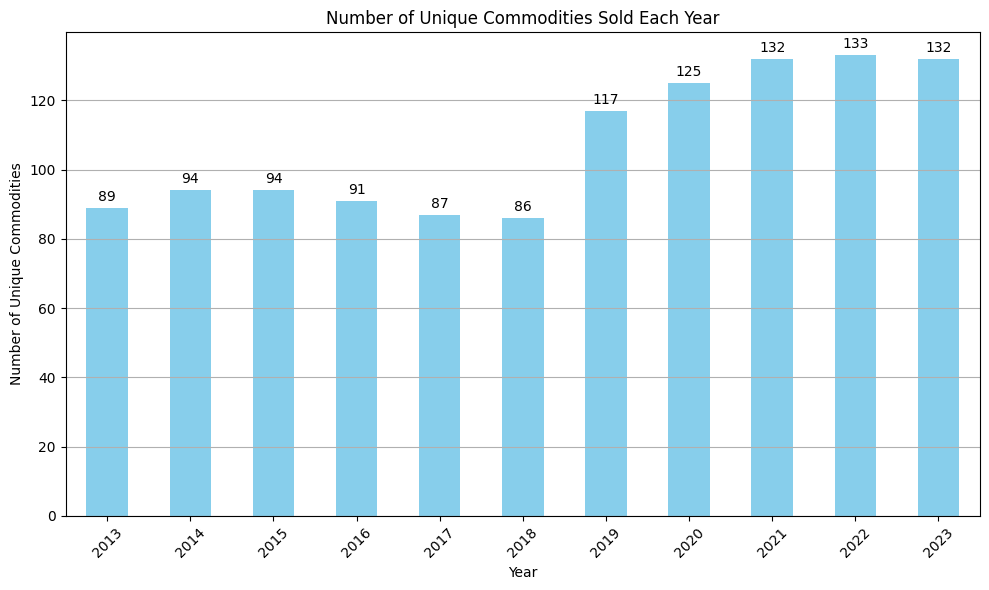

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by year and count the number of unique commodities sold each year
commodities_per_year = df.groupby(df['Date'].dt.year)['Commodity'].nunique()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = commodities_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Commodities Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Commodities')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines only on the y-axis

# Annotate each bar with its count value
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


In 2022 there were 133 commodities but in 2023 there were only 132 commodities. Find the commoditieswhich is sold in 2022 but not in 2023.

In [ ]:
# Group the data by year and get the set of unique commodities sold each year
commodities_2022 = set(df[df['Date'].dt.year == 2022]['Commodity'].unique())
commodities_2023 = set(df[df['Date'].dt.year == 2023]['Commodity'].unique())

# Find the commodity sold in 2022 but not in 2023
commodity_difference = commodities_2022 - commodities_2023

# Print the commodity that was sold in 2022 but not in 2023
print("Commodity sold in 2022 but not in 2023:", commodity_difference)


Commodity sold in 2022 but not in 2023: {'Sweet Lime'}


# Yearly average price of Potato Red

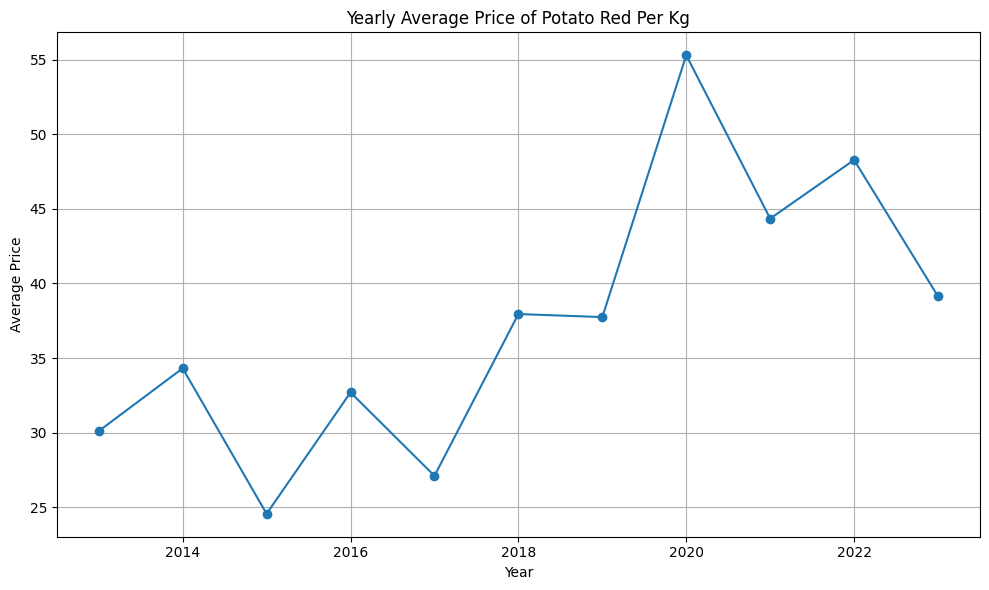

In [ ]:
# Filter the DataFrame for "Potato Red" commodity
potato_red_df = df[df['Commodity'] == 'Potato Red']

# Group by year and month, calculate the average price for each month
monthly_avg_price = potato_red_df.groupby([potato_red_df['Date'].dt.year, potato_red_df['Date'].dt.month])['Average'].mean()

# Group by year, calculate the average price for each year
yearly_avg_price = monthly_avg_price.groupby(level=0).mean()

# Plot the yearly average prices
plt.figure(figsize=(10, 6))
yearly_avg_price.plot(marker='o', linestyle='-')
plt.title('Yearly Average Price of Potato Red Per Kg')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


# Monthly Average Price of Potato Red



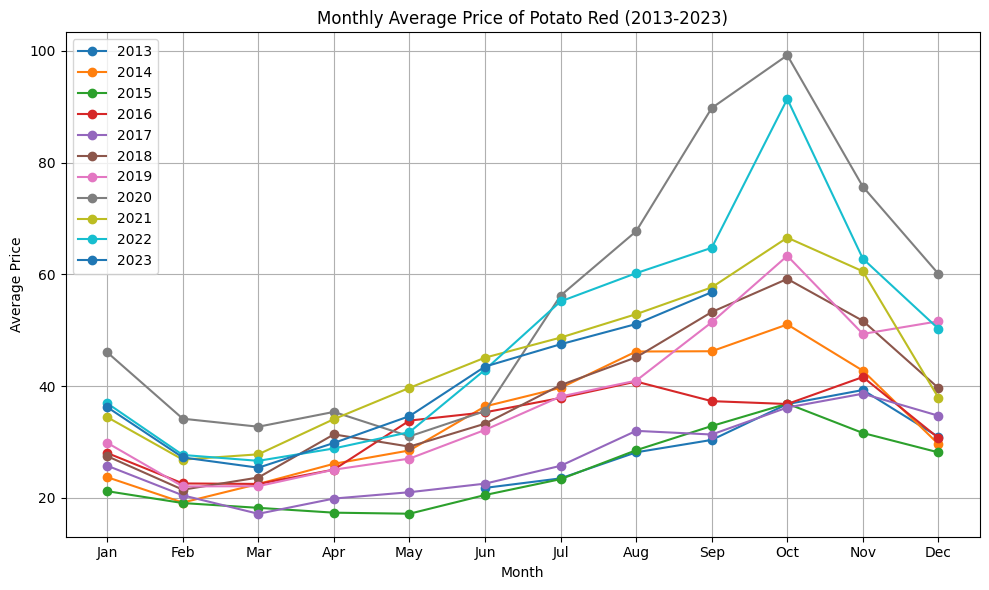

In [ ]:
# Filter the DataFrame for "Potato Red" commodity and years 2013 to 2023
potato_red_df = df[(df['Commodity'] == 'Potato Red') & (df['Date'].dt.year.between(2013, 2023))]

# Group by year and month, calculate the average price for each month
monthly_avg_price = potato_red_df.groupby([potato_red_df['Date'].dt.year, potato_red_df['Date'].dt.month])['Average'].mean()

# Plot the monthly average prices for each year
plt.figure(figsize=(10, 6))
for year in range(2013, 2024):
    yearly_avg_price = monthly_avg_price.xs(year)
    plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o', linestyle='-', label=year)

plt.title('Monthly Average Price of Potato Red (2013-2023)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


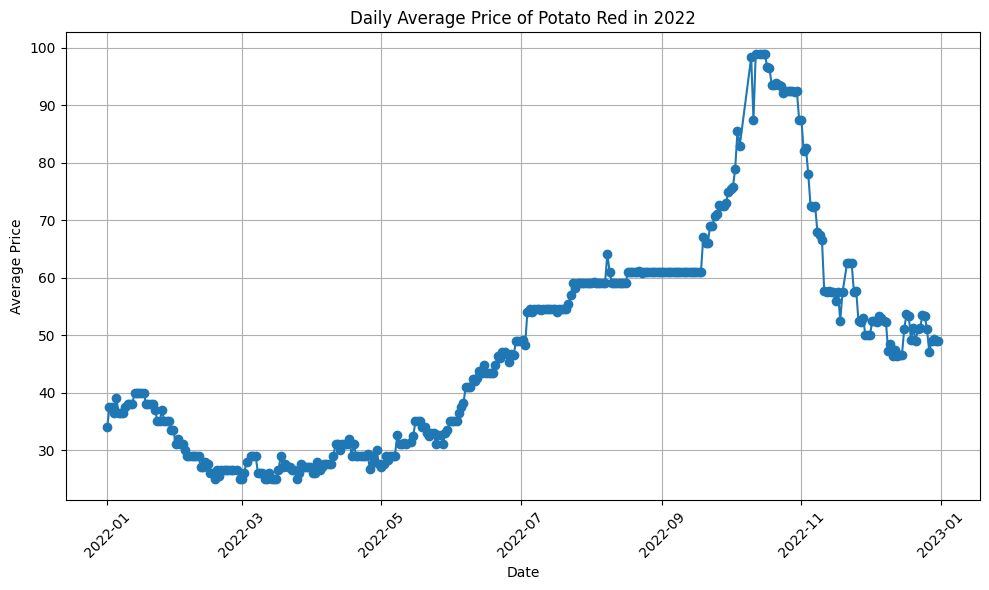

In [ ]:
# Filter the DataFrame for "Potato Red" commodity and the year 2022
potato_red_2022_df = df[(df['Commodity'] == 'Potato Red') & (df['Date'].dt.year == 2022)]

# Group by date and calculate the average price for each day
daily_avg_price_2022 = potato_red_2022_df.groupby(potato_red_2022_df['Date'].dt.date)['Average'].mean()

# Plot the daily average prices for 2022
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_price_2022.index, daily_avg_price_2022.values, marker='o', linestyle='-')
plt.title('Daily Average Price of Potato Red in 2022')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


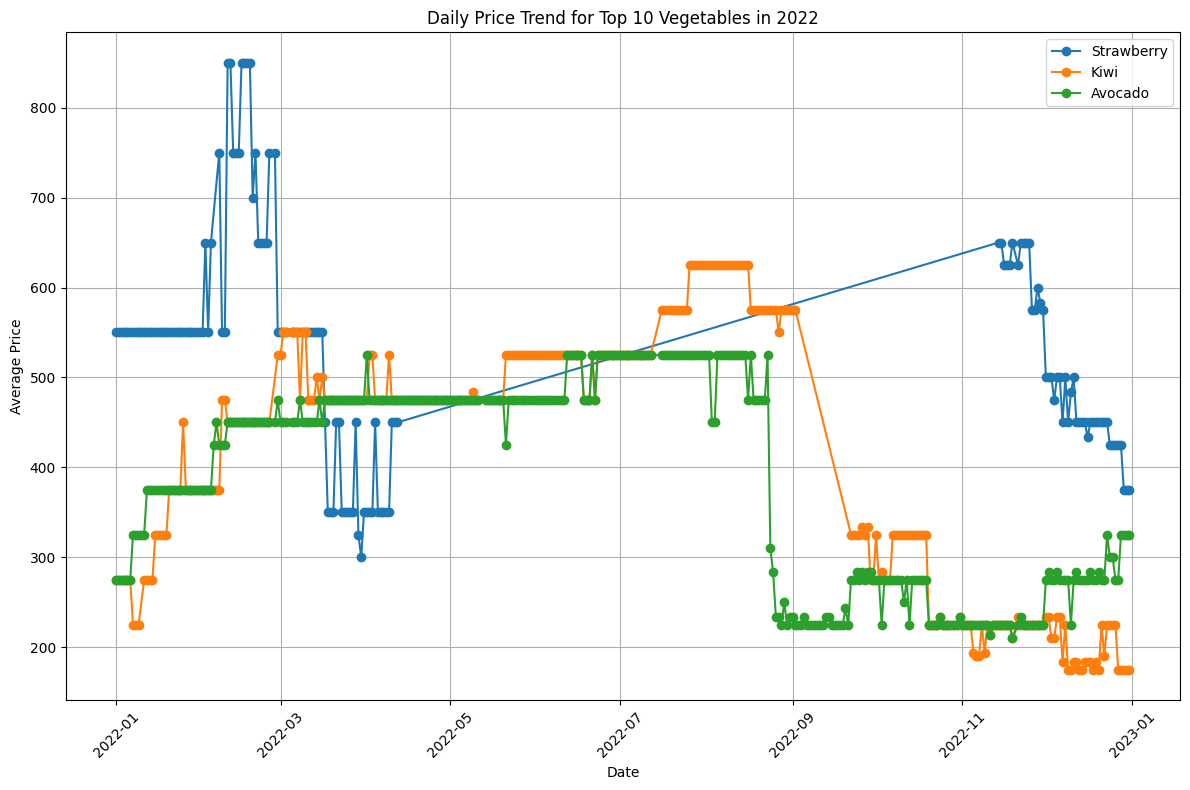

In [ ]:
# Calculate the average price for each vegetable
average_price_per_vegetable = df.groupby('Commodity')['Average'].mean()

# Select the top 10 vegetables with the highest average prices
top_10_vegetables = average_price_per_vegetable.nlargest(3)

# Filter the DataFrame for the top 10 vegetables and the year 2022
top_10_df_2022 = df[(df['Commodity'].isin(top_10_vegetables.index)) & (df['Date'].dt.year == 2022)]

# Plot the daily trend for each of the top 10 vegetables in 2022
plt.figure(figsize=(12, 8))
for vegetable in top_10_vegetables.index:
    vegetable_data = top_10_df_2022[top_10_df_2022['Commodity'] == vegetable]
    daily_avg_price = vegetable_data.groupby(vegetable_data['Date'].dt.date)['Average'].mean()
    plt.plot(daily_avg_price.index, daily_avg_price.values, marker='o', label=vegetable)

plt.title('Daily Price Trend for Top 10 Vegetables in 2022')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
